# Load the Data Set From s3

In [1]:
import boto3
import pandas as pd
import os
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Initialize the S3 client
s3_client = boto3.client('s3')
s3 = boto3.client('s3')
bucket_name = 'keithsbucketaws'
base_key = 'Add_data/'  

In [3]:
files = ['campain_add_data_lingerie.csv']
local_dir = '/tmp'

for file in files:
    s3_key = f"{base_key}{file}" 
    local_path = f"{local_dir}/{file}"
    
    s3.download_file(bucket_name, s3_key, local_path)
    print(f"Downloaded {file} to {local_path}")

Downloaded campain_add_data_lingerie.csv to /tmp/campain_add_data_lingerie.csv


In [4]:
# Load the data into a pandas DataFrame
df = pd.read_csv('/tmp/campain_add_data_lingerie.csv')

# EXPLORATORY DATA ANALYSIS
We begin by examining the structure of our data.
We can see that there are NaN values
Some Column Names can be shortened
How many unique Ad Set Names Exist?

In [5]:
# Display the first few rows
#df.head()

In [6]:
# rename columns for ease.
df = df.rename(columns={'Campaign name': 'campaign_name'})
df = df.rename(columns={'Ad set name': 'ad_set_name'})
df = df.rename(columns={'Ad name': 'ad_name'})
df = df.rename(columns={'Amount spent (GBP)': 'amount_spent_gbp'})
df = df.rename(columns={'CPM (cost per 1,000 impressions)': 'cost_per_thousand_impressions'})
df = df.rename(columns={'Link clicks': 'link_clicks'})
df = df.rename(columns={'CPC (cost per link click)': 'cost_per_link_click'})
df = df.rename(columns={'CTR (link click-through rate)': 'link_clickthrough_rate'})
df = df.rename(columns={'Cost per purchase': 'cost_per_purchase'})
df = df.rename(columns={'Purchases conversion value': 'purchases_conversion_value'})
df = df.rename(columns={'Purchase ROAS (return on ad spend)': 'purchase_roas'})
df = df.rename(columns={'Adds to cart': 'adds_to_cart'})
df = df.rename(columns={'Reporting starts': 'reporting_starts'})
df = df.rename(columns={'Reporting ends': 'reporting_ends'})
df.shape

(679, 16)

# GET RID OF ANY MISSING VALUES

In [7]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values)

campaign_name                      1
ad_set_name                        1
ad_name                            1
amount_spent_gbp                   3
Impressions                        0
cost_per_thousand_impressions      3
link_clicks                       32
cost_per_link_click               32
link_clickthrough_rate            32
Purchases                        247
cost_per_purchase                247
purchases_conversion_value       247
purchase_roas                    247
adds_to_cart                     195
reporting_starts                   0
reporting_ends                     0
dtype: int64


In [8]:
# Impute critical columns with the median
df['Purchases'] = df['Purchases'].fillna(df['Purchases'].median())
df['cost_per_purchase'] = df['cost_per_purchase'].fillna(df['cost_per_purchase'].median())
df['purchases_conversion_value'] = df['purchases_conversion_value'].fillna(df['purchases_conversion_value'].median())
df['purchase_roas'] = df['purchase_roas'].fillna(df['purchase_roas'].median())

# Convert to numeric and handle errors by coercing invalid parsing to NaN
df['amount_spent_gbp'] = pd.to_numeric(df['amount_spent_gbp'], errors='coerce')

# Now you can safely impute with the median
df['amount_spent_gbp'] = df['amount_spent_gbp'].fillna(df['amount_spent_gbp'].median())

df['cost_per_thousand_impressions'] = df['cost_per_thousand_impressions'].fillna(df['cost_per_thousand_impressions'].median())
df['link_clicks'] = df['link_clicks'].fillna(df['link_clicks'].median())
df['cost_per_link_click'] = df['cost_per_link_click'].fillna(df['cost_per_link_click'].median())
df['link_clickthrough_rate'] = df['link_clickthrough_rate'].fillna(df['link_clickthrough_rate'].median())

# Impute with the mode for 'adds_to_cart' column
df['adds_to_cart'] = df['adds_to_cart'].fillna(df['adds_to_cart'].mode()[0])


In [9]:
# Impute with the mode for categorical columns
df['campaign_name'] = df['campaign_name'].fillna(df['campaign_name'].mode()[0])
df['ad_set_name'] = df['ad_set_name'].fillna(df['ad_set_name'].mode()[0])
df['ad_name'] = df['ad_name'].fillna(df['ad_name'].mode()[0])

In [10]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values)

campaign_name                    0
ad_set_name                      0
ad_name                          0
amount_spent_gbp                 0
Impressions                      0
cost_per_thousand_impressions    0
link_clicks                      0
cost_per_link_click              0
link_clickthrough_rate           0
Purchases                        0
cost_per_purchase                0
purchases_conversion_value       0
purchase_roas                    0
adds_to_cart                     0
reporting_starts                 0
reporting_ends                   0
dtype: int64


# Perform Label Encoding
on the different unique campaigns, ad sets amd ads
Come back later and experiment with others like One-Hot

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the campaign names to labels
df['campaign_name_encoded'] = label_encoder.fit_transform(df['campaign_name'])

# Fit and transform the ad_set_name to labels
df['ad_set_name_encoded'] = label_encoder.fit_transform(df['ad_set_name'])

# Fit and transform the ad_name to labels
df['ad_name_encoded'] = label_encoder.fit_transform(df['ad_name'])

# Display the encoded columns
print(df[['campaign_name', 'campaign_name_encoded', 'ad_set_name', 'ad_set_name_encoded', 'ad_name', 'ad_name_encoded']].head())


                                       campaign_name  campaign_name_encoded  \
0  SW | Collection Sales | UK | CPR Cap 25  | Jun...                     61   
1                   SW | Advantage+ & LAL Sales | UK                     47   
2         SW | Advantage+ Sales | Subscription | USA                     52   
3  Instagram post: A lingerie club for likeminded...                      5   
4                   SW | Advantage+ & LAL Sales | UK                     47   

                                ad_set_name  ad_set_name_encoded  \
0                            Instagram Post                   48   
1          SW | Advantage+ & LAL Sales | UK                   86   
2                                    A+ USA                    2   
3                            Instagram Post                   48   
4  Advantage Plus (Exc. Existing Customers)                    3   

                                             ad_name  ad_name_encoded  
0       VID - COMMENTS - V5 - 40163426598506

In [12]:
# Display the first few rows
df.head()

,campaign_name,ad_set_name,ad_name,amount_spent_gbp,Impressions,cost_per_thousand_impressions,link_clicks,cost_per_link_click,link_clickthrough_rate,Purchases,cost_per_purchase,purchases_conversion_value,purchase_roas,adds_to_cart,reporting_starts,reporting_ends,campaign_name_encoded,ad_set_name_encoded,ad_name_encoded
0,SW | Collection Sales | UK | CPR Cap 25 | Jun...,Instagram Post,VID - COMMENTS - V5 - 401634265985060 – Copy,141158.75,35366271,3.991338,545420.0,0.258807,1.542204,9089.0,15.530724,350153.080,2.480562,26156.0,2024-01-01,2024-12-31,61,48,141
1,SW | Advantage+ & LAL Sales | UK,SW | Advantage+ & LAL Sales | UK,SW | Advantage+ & LAL Sales | UK,70.46,773896,4.867204,8653.0,0.435307,1.118109,162.0,23.251296,6861.520,1.821622,847.0,2024-01-01,2024-12-31,47,86,117
2,SW | Advantage+ Sales | Subscription | USA,A+ USA,Video - August Set,2820.37,403869,6.983378,5783.0,0.487700,1.431900,86.0,32.795000,5952.160,2.110418,887.0,2024-01-01,2024-12-31,52,2,177
3,Instagram post: A lingerie club for likeminded...,Instagram Post,Instagram post: A lingerie club for likeminded...,2480.00,762146,3.253970,31669.0,0.078310,4.155241,6.5,16.147000,279.525,2.587216,1.0,2024-01-01,2024-12-31,5,48,52
4,SW | Advantage+ & LAL Sales | UK,Advantage Plus (Exc. Existing Customers),Video - August Set,2321.35,516478,4.494577,4220.0,0.550083,0.817073,105.0,22.108095,4834.560,2.082650,629.0,2024-01-01,2024-12-31,47,3,177


In [13]:
# Number of unique ad set names
unique_ad_sets = df['ad_set_name'].nunique()
print(f"🎯 Unique ad set names: {unique_ad_sets}")

# Number of unique ad names names
unique_ad_names = df['ad_name'].nunique()
print(f"🎯 Unique ad names: {unique_ad_names}")

# Number of unique ad names names
unique_campaign_names = df['campaign_name'].nunique()
print(f"🎯 Unique campaign names: {unique_campaign_names}")

🎯 Unique ad set names: 99
🎯 Unique ad names: 214
🎯 Unique campaign names: 71


# Observe corelations

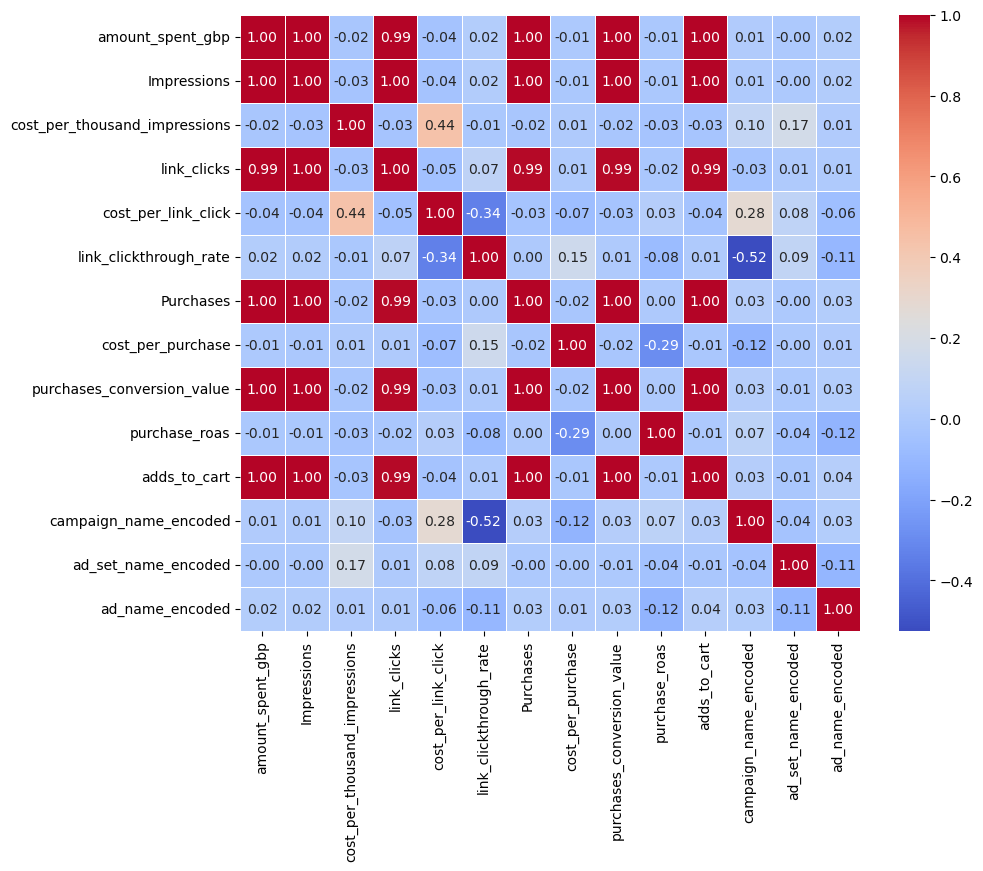

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

# Temporal Feature Extraction:
The reporting_starts and reporting_ends columns are great for feature extraction, especially with time-based trends.

For example, campaign_duration (as mentioned earlier) or even extracting month or day of week from reporting_starts can provide insights into patterns over time

In [15]:
df['reporting_starts'] = pd.to_datetime(df['reporting_starts'])
df['reporting_ends'] = pd.to_datetime(df['reporting_ends'])

df['campaign_duration'] = (df['reporting_ends'] - df['reporting_starts']).dt.days
df['start_month'] = df['reporting_starts'].dt.month
df['start_dayofweek'] = df['reporting_starts'].dt.dayofweek


In [16]:
df.head()

,campaign_name,ad_set_name,ad_name,amount_spent_gbp,Impressions,cost_per_thousand_impressions,link_clicks,cost_per_link_click,link_clickthrough_rate,Purchases,...,purchase_roas,adds_to_cart,reporting_starts,reporting_ends,campaign_name_encoded,ad_set_name_encoded,ad_name_encoded,campaign_duration,start_month,start_dayofweek
0,SW | Collection Sales | UK | CPR Cap 25 | Jun...,Instagram Post,VID - COMMENTS - V5 - 401634265985060 – Copy,141158.75,35366271,3.991338,545420.0,0.258807,1.542204,9089.0,...,2.480562,26156.0,2024-01-01,2024-12-31,61,48,141,365,1,0
1,SW | Advantage+ & LAL Sales | UK,SW | Advantage+ & LAL Sales | UK,SW | Advantage+ & LAL Sales | UK,70.46,773896,4.867204,8653.0,0.435307,1.118109,162.0,...,1.821622,847.0,2024-01-01,2024-12-31,47,86,117,365,1,0
2,SW | Advantage+ Sales | Subscription | USA,A+ USA,Video - August Set,2820.37,403869,6.983378,5783.0,0.487700,1.431900,86.0,...,2.110418,887.0,2024-01-01,2024-12-31,52,2,177,365,1,0
3,Instagram post: A lingerie club for likeminded...,Instagram Post,Instagram post: A lingerie club for likeminded...,2480.00,762146,3.253970,31669.0,0.078310,4.155241,6.5,...,2.587216,1.0,2024-01-01,2024-12-31,5,48,52,365,1,0
4,SW | Advantage+ & LAL Sales | UK,Advantage Plus (Exc. Existing Customers),Video - August Set,2321.35,516478,4.494577,4220.0,0.550083,0.817073,105.0,...,2.082650,629.0,2024-01-01,2024-12-31,47,3,177,365,1,0


# Remove un-encoded data

In [17]:
# Create a new dataframe with only encoded and numeric columns
df_encoded = df[['amount_spent_gbp', 'Impressions', 'cost_per_thousand_impressions', 
                 'link_clicks', 'cost_per_link_click', 'link_clickthrough_rate', 
                 'Purchases', 'cost_per_purchase', 'purchases_conversion_value', 
                 'purchase_roas', 'adds_to_cart', 'campaign_name_encoded', 
                 'ad_set_name_encoded', 'ad_name_encoded', 'campaign_duration', 
                 'start_month', 'start_dayofweek']]

# Check the new dataframe
df_encoded.head()


,amount_spent_gbp,Impressions,cost_per_thousand_impressions,link_clicks,cost_per_link_click,link_clickthrough_rate,Purchases,cost_per_purchase,purchases_conversion_value,purchase_roas,adds_to_cart,campaign_name_encoded,ad_set_name_encoded,ad_name_encoded,campaign_duration,start_month,start_dayofweek
0,141158.75,35366271,3.991338,545420.0,0.258807,1.542204,9089.0,15.530724,350153.080,2.480562,26156.0,61,48,141,365,1,0
1,70.46,773896,4.867204,8653.0,0.435307,1.118109,162.0,23.251296,6861.520,1.821622,847.0,47,86,117,365,1,0
2,2820.37,403869,6.983378,5783.0,0.487700,1.431900,86.0,32.795000,5952.160,2.110418,887.0,52,2,177,365,1,0
3,2480.00,762146,3.253970,31669.0,0.078310,4.155241,6.5,16.147000,279.525,2.587216,1.0,5,48,52,365,1,0
4,2321.35,516478,4.494577,4220.0,0.550083,0.817073,105.0,22.108095,4834.560,2.082650,629.0,47,3,177,365,1,0


# Rough Trainig

In [18]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['Purchases'])  # All columns except 'Purchases'
y = df_encoded['Purchases']  # 'Purchases' is the target

# Step 2: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Linear Regression model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 19.297866721897726
R-squared (R²): 0.9582695118119663


In [21]:
# 136 x 16
X.head()

,amount_spent_gbp,Impressions,cost_per_thousand_impressions,link_clicks,cost_per_link_click,link_clickthrough_rate,cost_per_purchase,purchases_conversion_value,purchase_roas,adds_to_cart,campaign_name_encoded,ad_set_name_encoded,ad_name_encoded,campaign_duration,start_month,start_dayofweek
0,141158.75,35366271,3.991338,545420.0,0.258807,1.542204,15.530724,350153.080,2.480562,26156.0,61,48,141,365,1,0
1,70.46,773896,4.867204,8653.0,0.435307,1.118109,23.251296,6861.520,1.821622,847.0,47,86,117,365,1,0
2,2820.37,403869,6.983378,5783.0,0.487700,1.431900,32.795000,5952.160,2.110418,887.0,52,2,177,365,1,0
3,2480.00,762146,3.253970,31669.0,0.078310,4.155241,16.147000,279.525,2.587216,1.0,5,48,52,365,1,0
4,2321.35,516478,4.494577,4220.0,0.550083,0.817073,22.108095,4834.560,2.082650,629.0,47,3,177,365,1,0


In [22]:
y.head()

0    9089.0
1     162.0
2      86.0
3       6.5
4     105.0
Name: Purchases, dtype: float64

In [25]:
X_test.head()

,amount_spent_gbp,Impressions,cost_per_thousand_impressions,link_clicks,cost_per_link_click,link_clickthrough_rate,cost_per_purchase,purchases_conversion_value,purchase_roas,adds_to_cart,campaign_name_encoded,ad_set_name_encoded,ad_name_encoded,campaign_duration,start_month,start_dayofweek
646,1.07,148,7.229730,116.0,0.691510,0.722864,16.147000,279.525,2.587216,1.0,61,53,141,365,1,0
336,71.59,18572,3.854728,109.0,0.656789,0.586905,11.931667,192.700,2.691717,7.0,61,39,88,365,1,0
63,585.68,254217,2.303859,2880.0,0.203361,1.132890,11.263077,2637.890,4.503978,331.0,60,34,153,365,1,0
367,55.63,7167,7.761965,850.0,0.065447,11.859913,16.147000,279.525,2.587216,1.0,30,48,77,365,1,0
101,394.32,91582,4.305650,470.0,0.838979,0.513201,10.657297,1256.450,3.186371,72.0,61,74,82,365,1,0


In [19]:
import joblib
import pandas as pd

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Actual Purchases': y_test,
    'Predicted Purchases': y_pred
})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Model and predictions saved successfully!")


Model and predictions saved successfully!


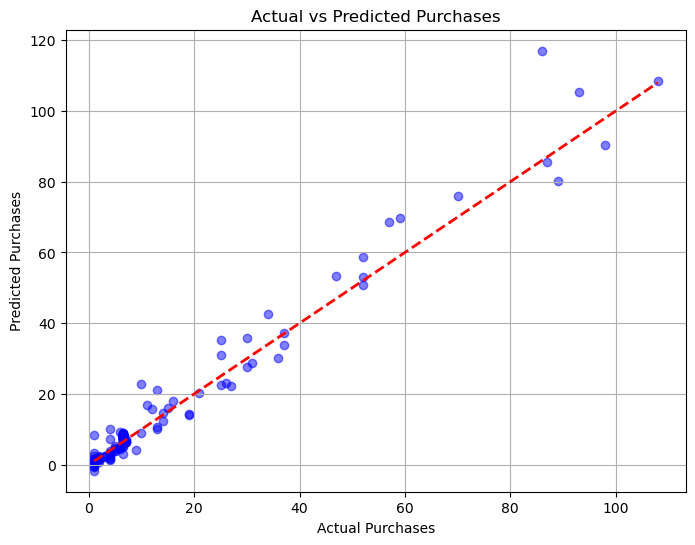

In [20]:
import matplotlib.pyplot as plt

# Create a scatter plot for Actual vs Predicted Purchases
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')  # Line for perfect predictions

# Set the plot labels and title
plt.xlabel('Actual Purchases')
plt.ylabel('Predicted Purchases')
plt.title('Actual vs Predicted Purchases')

# Show the plot
plt.grid(True)
plt.show()
